# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one, get one free). Some users might not receive any offer during certain weeks.

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer a type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product, whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars to get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10-day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the offer did not influence the customer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10-dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer a type. Or you could build a model that predicts whether someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).


# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and metadata about each offer (duration, type, etc.)
* profile.json—demographic data for each customer
* transcript.json—records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string)—type of offer i.e., BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int)—reward given for completing an offer
* duration (int)- time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int)- age of the customer
* became_member_on (int)- date when customer created an app account
* gender (str)- gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (i.e. transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int)- time in hours since the start of test. The data begins at time t=0
* value - (dict of strings)- either an offer id or transaction amount depending on the record

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the terminal from the orange icon in the top left of this notebook.

You can see how to access the terminal and how the installation works using the two images below.  First, you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

# Overview

#### We have a thorough grasp of the behavioral tendencies of consumers over time because of the dataset’s time-series organization, which includes observations made at various times in time. Users receive offers every few days, and their interactions with the offers are tracked.

### Some key features like…
* ####  User Information: This contains details about the user’s age, gender, and household income, frequency of purchases, when did they become a member.

* #### Offer Information: Each offer’s type, length, and other important information is collected.

* #### User-App Interaction: Information is also recorded on the user’s interactions with the app and the offer. Included in this are whether they looked at the offer, how long it took them to look at it after it was received, and if they finished it.

* #### Transactions: The collection also includes information about transactions, including the dollar value of each transaction.

All these features collectively would help us build an effective ML model in our project.

# My Strategy & Implementation

- My end goal is to use machine learning classification models to predict customer responses to offers.  It involves  preprocessing of data, model selection and training, followed by model evaluation and potential optimization.
- Since I have decided on a classification problem, we will be using only those models
- The expected solution is a model that can accurately predict whether a customer will respond to a Starbucks offer based on their past behaviour and the characteristics of the offer itself.

## Steps Involved:
1) Exploratory Data Analysis
2) Data Cleaning
3) Data Modeling
4) Evaluation
5) Future Improvements

In [1515]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from subprocess import call
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from scipy.stats import uniform
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
warnings.filterwarnings('ignore')
%matplotlib inline

# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

portfolio_copy = portfolio.copy()
profile_copy = profile.copy()
transcript_copy = transcript.copy()


In [1516]:
profile

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0
16997,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0


In [1517]:
portfolio

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [1518]:
transcript

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714


# Exploratory Data Analysis

## Analyzing 'profile' dataset

In [1519]:
profile.describe(include='all')

,gender,age,id,became_member_on,income
count,14825,17000.000000,17000,1.700000e+04,14825.000000
unique,3,NaN,17000,NaN,NaN
top,M,NaN,68be06ca386d4c31939f3a4f0e3dd783,NaN,NaN
freq,8484,NaN,1,NaN,NaN
mean,NaN,62.531412,NaN,2.016703e+07,65404.991568
std,NaN,26.738580,NaN,1.167750e+04,21598.299410
min,NaN,18.000000,NaN,2.013073e+07,30000.000000
25%,NaN,45.000000,NaN,2.016053e+07,49000.000000
50%,NaN,58.000000,NaN,2.017080e+07,64000.000000
75%,NaN,73.000000,NaN,2.017123e+07,80000.000000


In [1520]:
profile.head(5)

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [1521]:
profile.isna().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

2175 missing values in both gender and income columns. We will analyze it further in the data cleaning section

Percentage of Male: 49.91%
Percentage of Female: 36.05%
Percentage of Other: 1.25%


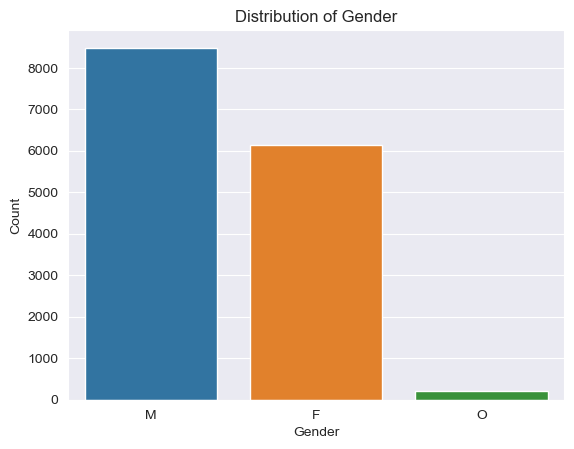

In [1522]:
male = (profile['gender'].value_counts()/len(profile['gender'])*100).round(2)[0]
female = (profile['gender'].value_counts()/len(profile['gender'])*100).round(2)[1]
other = (profile['gender'].value_counts()/len(profile['gender'])*100).round(2)[2]

print("Percentage of Male: {}%".format(male))
print("Percentage of Female: {}%".format(female))
print("Percentage of Other: {}%".format(other))

sns.countplot(x='gender', data=profile,order=['M','F','O'])
plt.title("Distribution of Gender")
plt.xlabel("Gender")
plt.ylabel("Count");

We see that close to 50% of the dataset entries consist of males

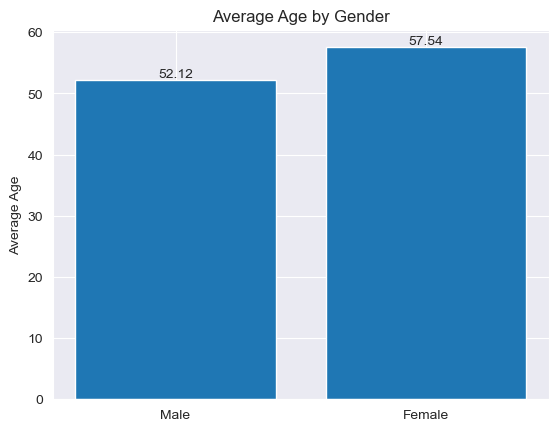

In [1523]:
# Plot for average age by gender

male_avg = (np.mean(profile[profile['gender'] == 'M'])[0]).round(2)
female_avg = (np.mean(profile[profile['gender'] == 'F'])[0]).round(2)

values = [male_avg,female_avg]

for i, value in enumerate(values):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.bar(['Male','Female'],[male_avg,female_avg])
plt.ylabel('Average Age')
plt.title('Average Age by Gender');

In [1524]:
profile

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0
16997,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0


Renaming the column which could be merged later on with the transcript dataset

In [1525]:
profile.rename(columns={"id":"customer_id"},inplace=True)

In [1526]:
# Converting the column to datetime format
profile['became_member_on'] = pd.to_datetime(profile['became_member_on'],format = "%Y%m%d")

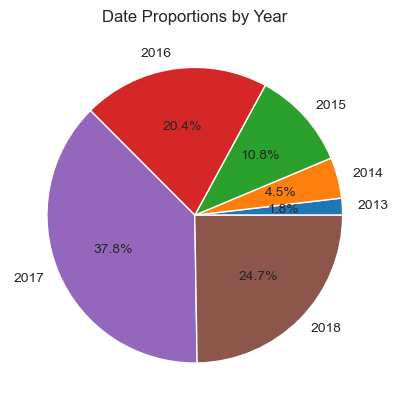

In [1713]:
# Pie chart
date_counts = profile['became_member_on'].dt.year.value_counts().sort_index()
plt.pie(date_counts.values, labels=date_counts.index, autopct='%1.1f%%')
plt.title('Date Proportions by Year')
plt.show()

Approximately 39% of individuals became members in the peak year, 2017, while there was a relatively low rate with 1.7 % of new members in 2013.

## Analyzing 'transcript'

In [1528]:
transcript

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714


In [1529]:
transcript.isna().sum()

person    0
event     0
value     0
time      0
dtype: int64

No null values in this dataset

In [1530]:
transcript['event'].unique()

array(['offer received', 'offer viewed', 'transaction', 'offer completed'],
      dtype=object)

Percentage of transaction is 45.33%
Percentage of offer received is 24.88%
Percentage of offer viewed is 18.83%
Percentage of offer completed is 10.95%


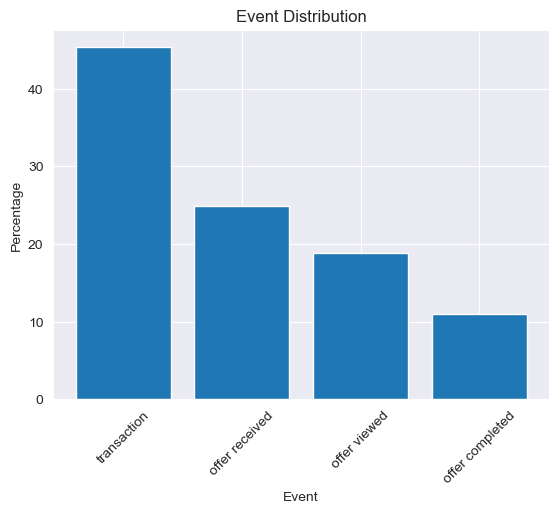

In [1531]:
# Plotting the event distribution
event_counts = transcript['event'].value_counts()
event_percentages = {event: (count / len(transcript) * 100) for event, count in event_counts.items()}

for key,value in event_percentages.items():
    print("Percentage of {} is {}%".format(key,round(value,2)))

plt.bar(event_percentages.keys(), event_percentages.values())
plt.title('Event Distribution')
plt.xlabel('Event')
plt.ylabel('Percentage')
plt.xticks(rotation=45);

- It is observed that the majority of events are categorized as 'transaction' with a percentage of 45.33%.
- This indicates that a significant portion of the data represents customer transactions.
- The second most frequent event is 'offer received' with a percentage of 24.88%, suggesting that a considerable number of customers received promotional offers.
- The 'offer viewed' event follows closely with a percentage of 18.83%, indicating that a substantial portion of customers actually viewed the offers they received.
- Lastly, 'offer completed' accounts for 10.95% of the events, suggesting that a smaller but notable percentage of customers completed the promotional offers they received.

In [1532]:
transcript['value'].value_counts()

{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'}    14983
{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}    14924
{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}    14891
{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'}    14835
{'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'}    14374
                                                    ...  
{'amount': 42.31}                                       1
{'amount': 44.62}                                       1
{'amount': 42.27}                                       1
{'amount': 108.89}                                      1
{'amount': 476.33}                                      1
Name: value, Length: 5121, dtype: int64

In [1533]:
def extract_values(val, key1, key2=None):
    """
        Extracts values from a dictionary-like object based on the provided keys.
        Args:
            val (dict): A dictionary-like object.
            key1 (str): The first key to extract the value from.
            key2 (str, optional): The second key to extract the value from if the first key is not found. Defaults to None.

        Returns:
            The value corresponding to key1 or key2 if found in the dictionary, otherwise None.
    """
    if key2:
        return val.get(key1) or val.get(key2)
    else:
        return val.get(key1)

transcript['offer_id'] = transcript['value'].apply(extract_values, args=('offer_id', 'offer id'))
transcript['amount'] = transcript['value'].apply(extract_values, args=('amount',))

In [1534]:
transcript['amount'].unique()

array([   nan,   0.83,  34.56, ..., 685.07, 405.04, 476.33])

Renaming the columns for future merge operation

In [1535]:
# Renaming the columns
transcript.rename(columns={"offer id":"offer_id","person":"customer_id"},inplace=True)

# Data Cleaning

## Profile dataset

In [1537]:
profile['gender'].unique()

array([None, 'F', 'M', 'O'], dtype=object)

In [1538]:
# Creating dummy variables for gender column

profile = pd.get_dummies(profile,columns=['gender'])
profile.rename(columns={"gender_F":"female","gender_M":"male","gender_O":"other_gender"},inplace=True)

In [1539]:
profile

,age,customer_id,became_member_on,income,female,male,other_gender
0,118,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN,0,0,0
1,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,1,0,0
2,118,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,NaN,0,0,0
3,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,1,0,0
4,118,a03223e636434f42ac4c3df47e8bac43,2017-08-04,NaN,0,0,0
...,...,...,...,...,...,...,...
16995,45,6d5f3a774f3d4714ab0c092238f3a1d7,2018-06-04,54000.0,1,0,0
16996,61,2cb4f97358b841b9a9773a7aa05a9d77,2018-07-13,72000.0,0,1,0
16997,49,01d26f638c274aa0b965d24cefe3183f,2017-01-26,73000.0,0,1,0
16998,83,9dc1421481194dcd9400aec7c9ae6366,2016-03-07,50000.0,1,0,0


### Preprocessing Age column

In [1540]:
profile['age'].describe()

count    17000.000000
mean        62.531412
std         26.738580
min         18.000000
25%         45.000000
50%         58.000000
75%         73.000000
max        118.000000
Name: age, dtype: float64

The max value for age is 118, which is quite not normal. Let's try to figure it out why

In [1541]:
profile_118 = profile[profile['age']==118]
profile_118

,age,customer_id,became_member_on,income,female,male,other_gender
0,118,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN,0,0,0
2,118,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,NaN,0,0,0
4,118,a03223e636434f42ac4c3df47e8bac43,2017-08-04,NaN,0,0,0
6,118,8ec6ce2a7e7949b1bf142def7d0e0586,2017-09-25,NaN,0,0,0
7,118,68617ca6246f4fbc85e91a2a49552598,2017-10-02,NaN,0,0,0
...,...,...,...,...,...,...,...
16980,118,5c686d09ca4d475a8f750f2ba07e0440,2016-09-01,NaN,0,0,0
16982,118,d9ca82f550ac4ee58b6299cf1e5c824a,2016-04-15,NaN,0,0,0
16989,118,ca45ee1883624304bac1e4c8a114f045,2018-03-05,NaN,0,0,0
16991,118,a9a20fa8b5504360beb4e7c8712f8306,2016-01-16,NaN,0,0,0


In [1542]:
profile_118.isna().sum()

age                    0
customer_id            0
became_member_on       0
income              2175
female                 0
male                   0
other_gender           0
dtype: int64

All the null values we see in gender and income columns are from the 118 entries of age.


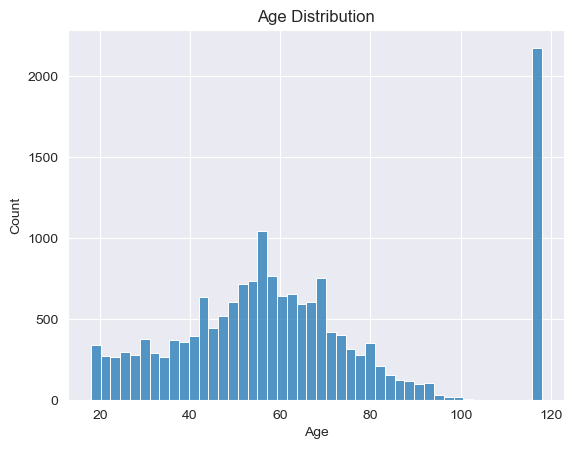

In [1543]:
# Histogram of age
sns.histplot(profile['age'])
plt.title("Age Distribution")
plt.xlabel("Age");

By looking at the plot, we could say that the 118 is an outlier and let's replace it with NaN

In [1544]:
profile['age'] = [np.nan if x == 118 else x for x in profile['age']]

In [1545]:
profile[profile['age'] == 118]

,age,customer_id,became_member_on,income,female,male,other_gender


No entries with age value 118

In [1546]:
# Dropping values with NaN
profile.dropna(inplace=True)

In [1547]:
profile.isna().sum()

age                 0
customer_id         0
became_member_on    0
income              0
female              0
male                0
other_gender        0
dtype: int64

In [1548]:
profile

,age,customer_id,became_member_on,income,female,male,other_gender
1,55.0,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,1,0,0
3,75.0,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,1,0,0
5,68.0,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0,0,1,0
8,65.0,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0,0,1,0
12,58.0,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0,0,1,0
...,...,...,...,...,...,...,...
16995,45.0,6d5f3a774f3d4714ab0c092238f3a1d7,2018-06-04,54000.0,1,0,0
16996,61.0,2cb4f97358b841b9a9773a7aa05a9d77,2018-07-13,72000.0,0,1,0
16997,49.0,01d26f638c274aa0b965d24cefe3183f,2017-01-26,73000.0,0,1,0
16998,83.0,9dc1421481194dcd9400aec7c9ae6366,2016-03-07,50000.0,1,0,0


Binning our age column and creating age groups.

Let's categorize them as:
 - Young Adult: 18-25 years old
- Adult: 25-65 years old
- Senior: 65 years and older

Age groups:
- Young Adult - 1
- Adult - 2
- Senior - 3

In [1549]:
# Create bins from the ages based on the categories
bins = [profile['age'].min(), 25, 65, profile['age'].max() + 1]
labels = ['young_adult', 'adult', 'senior']
profile['age_category'] = pd.cut(profile['age'], bins=bins, labels=labels, include_lowest=True)

# Categorizing
profile['age_category']= pd.Categorical(profile['age_category'], categories=labels, ordered=True)

# Assigning numerical values
age_map_values = {'young_adult':1,'adult':2,'senior':3}
profile['age_bins'] = profile['age_category'].map(age_map_values)

In [1550]:
profile.drop(['age','age_category'],axis=1,inplace=True)

In [1551]:
profile

,customer_id,became_member_on,income,female,male,other_gender,age_bins
1,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,1,0,0,2
3,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,1,0,0,3
5,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0,0,1,0,3
8,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0,0,1,0,2
12,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0,0,1,0,2
...,...,...,...,...,...,...,...
16995,6d5f3a774f3d4714ab0c092238f3a1d7,2018-06-04,54000.0,1,0,0,2
16996,2cb4f97358b841b9a9773a7aa05a9d77,2018-07-13,72000.0,0,1,0,2
16997,01d26f638c274aa0b965d24cefe3183f,2017-01-26,73000.0,0,1,0,2
16998,9dc1421481194dcd9400aec7c9ae6366,2016-03-07,50000.0,1,0,0,3


### Preprocessing income column

Let's categorize them as:
- Moderate  as 1
- Good as 2
- Excellent as 3

In [1552]:
#Changing the datatype to int
profile['income']=profile['income'].astype('int64')


# Creating bins
income_bins = [profile['income'].min(),64000, 94000,profile['income'].max() + 1]
income_labels = ['moderate','good','excellent']
profile['income_labels'] = pd.cut(profile['income'],bins=income_bins,labels=income_labels,include_lowest=True)

#Categorizing
profile['income_labels']= pd.Categorical(profile['income_labels'], categories=income_labels, ordered=True)

# Assigning numerical values
income_label_values = {'moderate':1,'good':2,'excellent':3}
profile['income_bins'] = profile['income_labels'].map(income_label_values)

In [1553]:
profile[['income','income_labels','income_bins']]

,income,income_labels,income_bins
1,112000,excellent,3
3,100000,excellent,3
5,70000,good,2
8,53000,moderate,1
12,51000,moderate,1
...,...,...,...
16995,54000,moderate,1
16996,72000,good,2
16997,73000,good,2
16998,50000,moderate,1


In [1554]:
# Dropping the income and income_labels column
profile.drop(['income_labels','income'],inplace=True,axis=1)

In [1555]:
profile

,customer_id,became_member_on,female,male,other_gender,age_bins,income_bins
1,0610b486422d4921ae7d2bf64640c50b,2017-07-15,1,0,0,2,3
3,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,1,0,0,3,3
5,e2127556f4f64592b11af22de27a7932,2018-04-26,0,1,0,3,2
8,389bc3fa690240e798340f5a15918d5c,2018-02-09,0,1,0,2,1
12,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,0,1,0,2,1
...,...,...,...,...,...,...,...
16995,6d5f3a774f3d4714ab0c092238f3a1d7,2018-06-04,1,0,0,2,1
16996,2cb4f97358b841b9a9773a7aa05a9d77,2018-07-13,0,1,0,2,2
16997,01d26f638c274aa0b965d24cefe3183f,2017-01-26,0,1,0,2,2
16998,9dc1421481194dcd9400aec7c9ae6366,2016-03-07,1,0,0,3,1


### Preprocessing became_member_on column

In [1556]:
profile['became_member_on']

1       2017-07-15
3       2017-05-09
5       2018-04-26
8       2018-02-09
12      2017-11-11
           ...    
16995   2018-06-04
16996   2018-07-13
16997   2017-01-26
16998   2016-03-07
16999   2017-07-22
Name: became_member_on, Length: 14825, dtype: datetime64[ns]

Extracting month and year from the column

In [1557]:
profile['member_year'] = profile['became_member_on'].dt.year
profile['member_month'] = profile['became_member_on'].dt.month

In [1733]:
profile

,customer_id,became_member_on,female,male,other_gender,age_bins,income_bins,member_year,member_month
1,0610b486422d4921ae7d2bf64640c50b,2017-07-15,1,0,0,2,3,2017,7
3,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,1,0,0,3,3,2017,5
5,e2127556f4f64592b11af22de27a7932,2018-04-26,0,1,0,3,2,2018,4
8,389bc3fa690240e798340f5a15918d5c,2018-02-09,0,1,0,2,1,2018,2
12,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,0,1,0,2,1,2017,11
...,...,...,...,...,...,...,...,...,...
16995,6d5f3a774f3d4714ab0c092238f3a1d7,2018-06-04,1,0,0,2,1,2018,6
16996,2cb4f97358b841b9a9773a7aa05a9d77,2018-07-13,0,1,0,2,2,2018,7
16997,01d26f638c274aa0b965d24cefe3183f,2017-01-26,0,1,0,2,2,2017,1
16998,9dc1421481194dcd9400aec7c9ae6366,2016-03-07,1,0,0,3,1,2016,3


## Portfolio Dataset

In [1558]:
portfolio

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [1559]:
portfolio_test = portfolio.copy()

In [1560]:
portfolio_test

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


Expanding the channels column values to create new with those values as there are multiple entries which later helps us to avoid numerical bias

In [1561]:
# Expanding the channels column into separate columns
channels_expanded = pd.get_dummies(portfolio_test['channels'].apply(pd.Series).stack()).sum(level=0)
channels_expanded

,email,mobile,social,web
0,1,1,1,0
1,1,1,1,1
2,1,1,0,1
3,1,1,0,1
4,1,0,0,1
5,1,1,1,1
6,1,1,1,1
7,1,1,1,0
8,1,1,1,1
9,1,1,0,1


In [1562]:
# Joining the new columns
portfolio_test = pd.concat([portfolio_test,channels_expanded],axis=1)
portfolio_test

,reward,channels,difficulty,duration,offer_type,id,email,mobile,social,web
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,0,1
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837,1,1,1,0
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5,1,1,0,1


In [1563]:
# Dropping the channels column
portfolio_test.drop('channels',inplace=True,axis=1)

In [1564]:
portfolio_test

,reward,difficulty,duration,offer_type,id,email,mobile,social,web
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0
1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1
2,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,0,1
3,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1
4,5,20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1
5,3,7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1
6,2,10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1
7,0,0,3,informational,5a8bc65990b245e5a138643cd4eb9837,1,1,1,0
8,5,5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1
9,2,10,7,discount,2906b810c7d4411798c6938adc9daaa5,1,1,0,1


## Preprocessing offer_type column

Creating dummy variables for offer_type

In [1565]:
portfolio_test = pd.concat([portfolio_test,pd.get_dummies(portfolio_test['offer_type'])],axis=1)

In [1566]:
portfolio_test.drop('offer_type',axis=1,inplace=True)

In [1567]:
# Re-ordering the columns
portfolio_test=portfolio_test.reindex(columns=['id', 'difficulty', 'duration', 'reward', 'email', 'mobile', 'social',
                                        'web', 'bogo', 'discount', 'informational'])
portfolio_test

,id,difficulty,duration,reward,email,mobile,social,web,bogo,discount,informational
0,ae264e3637204a6fb9bb56bc8210ddfd,10,7,10,1,1,1,0,1,0,0
1,4d5c57ea9a6940dd891ad53e9dbe8da0,10,5,10,1,1,1,1,1,0,0
2,3f207df678b143eea3cee63160fa8bed,0,4,0,1,1,0,1,0,0,1
3,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,7,5,1,1,0,1,1,0,0
4,0b1e1539f2cc45b7b9fa7c272da2e1d7,20,10,5,1,0,0,1,0,1,0
5,2298d6c36e964ae4a3e7e9706d1fb8c2,7,7,3,1,1,1,1,0,1,0
6,fafdcd668e3743c1bb461111dcafc2a4,10,10,2,1,1,1,1,0,1,0
7,5a8bc65990b245e5a138643cd4eb9837,0,3,0,1,1,1,0,0,0,1
8,f19421c1d4aa40978ebb69ca19b0e20d,5,5,5,1,1,1,1,1,0,0
9,2906b810c7d4411798c6938adc9daaa5,10,7,2,1,1,0,1,0,1,0


In [1568]:
portfolio_test.rename(columns={"id":"offer_id"},inplace=True)

In [1569]:
portfolio = portfolio_test.copy()

In [1570]:
portfolio

,offer_id,difficulty,duration,reward,email,mobile,social,web,bogo,discount,informational
0,ae264e3637204a6fb9bb56bc8210ddfd,10,7,10,1,1,1,0,1,0,0
1,4d5c57ea9a6940dd891ad53e9dbe8da0,10,5,10,1,1,1,1,1,0,0
2,3f207df678b143eea3cee63160fa8bed,0,4,0,1,1,0,1,0,0,1
3,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,7,5,1,1,0,1,1,0,0
4,0b1e1539f2cc45b7b9fa7c272da2e1d7,20,10,5,1,0,0,1,0,1,0
5,2298d6c36e964ae4a3e7e9706d1fb8c2,7,7,3,1,1,1,1,0,1,0
6,fafdcd668e3743c1bb461111dcafc2a4,10,10,2,1,1,1,1,0,1,0
7,5a8bc65990b245e5a138643cd4eb9837,0,3,0,1,1,1,0,0,0,1
8,f19421c1d4aa40978ebb69ca19b0e20d,5,5,5,1,1,1,1,1,0,0
9,2906b810c7d4411798c6938adc9daaa5,10,7,2,1,1,0,1,0,1,0


## transcript dataset

Preprocessing event columns

In [1571]:
transcript

,customer_id,event,value,time,offer_id,amount
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,2906b810c7d4411798c6938adc9daaa5,NaN
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0,fafdcd668e3743c1bb461111dcafc2a4,NaN
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN
...,...,...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714,None,1.59
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714,None,9.53
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714,None,3.61
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714,None,3.53


In [1572]:
# Dropping the value column since we have already expanded in an EDA section
transcript.drop('value',axis=1,inplace=True)

To ensure our analysis focuses on offer-related events, we will eliminate all transaction events as they are not directly relevant to offers. Additionally, we will exclude all instances of 'offer received' events, as our main focus is on determining whether customers only viewed the offer or both viewed and completed it.

In [1573]:
transcript.dtypes

customer_id     object
event           object
time             int64
offer_id        object
amount         float64
dtype: object

In [1574]:
transcript['amount'].unique()

array([   nan,   0.83,  34.56, ..., 685.07, 405.04, 476.33])

In [1738]:
transcript.head(10)

,customer_id,event,time,offer_id,amount
12650,389bc3fa690240e798340f5a15918d5c,offer viewed,0,f19421c1d4aa40978ebb69ca19b0e20d,NaN
12651,d1ede868e29245ea91818a903fec04c6,offer viewed,0,5a8bc65990b245e5a138643cd4eb9837,NaN
12652,102e9454054946fda62242d2e176fdce,offer viewed,0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN
12653,02c083884c7d45b39cc68e1314fec56c,offer viewed,0,ae264e3637204a6fb9bb56bc8210ddfd,NaN
12655,be8a5d1981a2458d90b255ddc7e0d174,offer viewed,0,5a8bc65990b245e5a138643cd4eb9837,NaN
12656,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,offer viewed,0,2906b810c7d4411798c6938adc9daaa5,NaN
12658,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,offer completed,0,2906b810c7d4411798c6938adc9daaa5,NaN
12660,8c7df0c393db488aac3e58b06a7ea5f9,offer viewed,0,2298d6c36e964ae4a3e7e9706d1fb8c2,NaN
12661,e528ceb341964128aaf58a59733ec2af,offer viewed,0,2298d6c36e964ae4a3e7e9706d1fb8c2,NaN
12662,262ad0fb526a4d53b572007da60cce24,offer viewed,0,f19421c1d4aa40978ebb69ca19b0e20d,NaN


In [1575]:
transcript = transcript[transcript['event'] != 'transaction']
transcript = transcript[transcript['event'] != 'offer received']

In [1576]:
profile_columns_to_convert = ['male','female','other_gender']
profile[profile_columns_to_convert] = profile[profile_columns_to_convert].astype("int64")

portfolio_columns_to_convert = ['email','mobile','social','web','bogo','discount']
portfolio[portfolio_columns_to_convert] = portfolio[portfolio_columns_to_convert].astype("int64")

## Merging all datasets


In [1577]:
# Merging 'transcript' dataset with 'portfolio' on 'offer_id'
df_h = transcript.merge(portfolio,how='left',on='offer_id')

In [1578]:
# Joining 'df' dataset with 'profile' on 'customer_id'
df = df_h.merge(profile, on = 'customer_id')

In [1579]:
# New column with binary values that corresponds with the values in event column
df['event_result'] = (df['event'] == 'offer completed').astype(int)
df['event_result'] = df['event_result'].fillna(0)

In [1580]:
df

,customer_id,event,time,offer_id,amount,difficulty,duration,reward,email,mobile,...,informational,became_member_on,female,male,other_gender,age_bins,income_bins,member_year,member_month,event_result
0,389bc3fa690240e798340f5a15918d5c,offer viewed,0,f19421c1d4aa40978ebb69ca19b0e20d,NaN,5,5,5,1,1,...,0,2018-02-09,0,1,0,2,1,2018,2,0
1,389bc3fa690240e798340f5a15918d5c,offer completed,60,f19421c1d4aa40978ebb69ca19b0e20d,NaN,5,5,5,1,1,...,0,2018-02-09,0,1,0,2,1,2018,2,1
2,389bc3fa690240e798340f5a15918d5c,offer viewed,192,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,5,7,5,1,1,...,0,2018-02-09,0,1,0,2,1,2018,2,0
3,389bc3fa690240e798340f5a15918d5c,offer viewed,354,2906b810c7d4411798c6938adc9daaa5,NaN,10,7,2,1,1,...,0,2018-02-09,0,1,0,2,1,2018,2,0
4,389bc3fa690240e798340f5a15918d5c,offer viewed,438,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,5,7,5,1,1,...,0,2018-02-09,0,1,0,2,1,2018,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82299,cff228bfca314af0b81f421c7e33cce5,offer viewed,690,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,20,10,5,1,0,...,0,2015-08-15,1,0,0,2,2,2015,8,0
82300,cff228bfca314af0b81f421c7e33cce5,offer completed,696,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,20,10,5,1,0,...,0,2015-08-15,1,0,0,2,2,2015,8,1
82301,86ee5a4052274038a6eb8f22838e2438,offer completed,696,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,5,7,5,1,1,...,0,2017-01-15,0,1,0,2,1,2017,1,1
82302,b22c0e74398046bd94c404285b01cd16,offer viewed,696,ae264e3637204a6fb9bb56bc8210ddfd,NaN,10,7,10,1,1,...,0,2018-01-12,1,0,0,3,2,2018,1,0


# Data Modeling



## Our aim is to build a model that would predict a customer's response to a particular promotion.

This is a classification problem as we are predicting whether the offer will be completed or not. Hence, we will be using classification algorithms

The algorithms we will be using are
1. Random Forest
2. Naive Bayes
3. Logistic Regression
4. Decision Tree
5. Support Vector Machines (SVM)
6. K-Nearest Neighbors (KNN):

We will first apply baseline modeling and the algorithm with the highest accuracy, we will try to improve it by hyperparameter tuning.

In [1631]:
# Features
X = df[['difficulty','reward','email','mobile','social','web','bogo','discount','informational','female','male','other_gender','age_bins','income_bins' ,'member_year','member_month']]

# Labels
y = df['event_result'].ravel()

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state=42)

In [1633]:
# Minmax scaling of the data
scaler_x= MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_min_max = scaler_x.fit_transform(X_train)
y_train_min_max = scaler_y.fit_transform(y_train.reshape(-1,1))

X_test_min_max = scaler_x.transform(X_test)
y_test_min_max = scaler_y.transform(y_test.reshape(-1,1))

# Baseline Modeling

In [1616]:
# Define the models

all_models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier()
}

all_scores = dict()

for key,value in all_models.items():
    value.fit(X_train_min_max,y_train)
    value.predict(X_test_min_max)
    score = (value.score(X_test_min_max,y_test))*100
    all_scores[key] = score
all_scores

{'Random Forest': 56.180139316377776,
 'Logistic Regression': 63.380852097845455,
 'SVM': 63.623845780009724,
 'Naive Bayes': 50.52243641665317,
 'Decision Tree': 56.26518710513526,
 'KNN': 56.520330471407746}

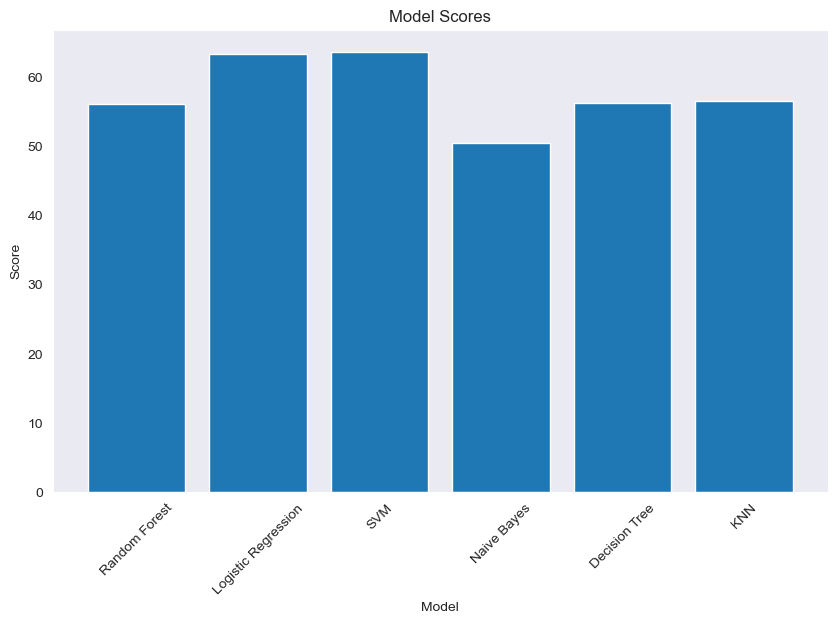

In [1694]:
# Plotting the bar chart for all models
all_scores_df = pd.DataFrame.from_dict(all_scores, orient='index', columns=['Score'])
all_scores_df.index.name = 'Model'

plt.figure(figsize=(10, 6))
plt.bar(all_scores_df.index, all_scores_df['Score'])
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Scores')
plt.xticks(rotation=45)
plt.grid(None)
plt.show()

SVM and Logistic Regression outperforms other models with the accuracy scores of 63.62%. and 63.38% respectively.

Now, first let's try to enhance SVM performance through hyperparameter tuning.

In [1637]:
# For SVM model

# Create a pipeline
pipe = Pipeline([('scaler', MinMaxScaler()),
                 ('svc',SVC())])

# Create space of candidate learning algorithms and their hyperparameters
param_grid = {'svc__C': [ 100, 1000],
              'svc__gamma': [ 0.001, 0.0001],
              'svc__kernel': ['linear', 'sigmoid' ] }

# Create randomized search 10-fold cross-validation and 100 iterations
clf = RandomizedSearchCV(pipe, param_grid, cv=5, n_iter=100, n_jobs=-1,verbose=2)

# Fit randomized search
best_model = clf.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ..svc__C=100, svc__gamma=0.0001, svc__kernel=linear; total time=29.7min
[CV] END .svc__C=1000, svc__gamma=0.001, svc__kernel=sigmoid; total time=15.5min
[CV] END svc__C=1000, svc__gamma=0.0001, svc__kernel=sigmoid; total time= 4.3min
[CV] END svc__C=1000, svc__gamma=0.0001, svc__kernel=sigmoid; total time= 4.4min
[CV] END ..svc__C=100, svc__gamma=0.001, svc__kernel=sigmoid; total time= 5.6min
[CV] END .svc__C=100, svc__gamma=0.0001, svc__kernel=sigmoid; total time= 4.1min
[CV] END .svc__C=100, svc__gamma=0.0001, svc__kernel=sigmoid; total time= 3.3min
[CV] END ..svc__C=1000, svc__gamma=0.001, svc__kernel=linear; total time=42.5min
[CV] END ...svc__C=100, svc__gamma=0.001, svc__kernel=linear; total time=29.7min
[CV] END .svc__C=1000, svc__gamma=0.001, svc__kernel=sigmoid; total time=14.3min
[CV] END svc__C=1000, svc__gamma=0.0001, svc__kernel=sigmoid; total time= 4.0min
[CV] END svc__C=1000, svc__gamma=0.0001, svc__ker

In [1638]:
# View the best model
best_hyperparams = best_model.best_estimator_.get_params()
print('Best Hyperparameters:\n', best_hyperparams)

# View the best score
best_score = best_model.best_score_
print('Best Score:', best_score)

Best Hyperparameters:
 {'memory': None, 'steps': [('scaler', MinMaxScaler()), ('svc', SVC(C=100, gamma=0.001, kernel='linear'))], 'verbose': False, 'scaler': MinMaxScaler(), 'svc': SVC(C=100, gamma=0.001, kernel='linear'), 'scaler__clip': False, 'scaler__copy': True, 'scaler__feature_range': (0, 1), 'svc__C': 100, 'svc__break_ties': False, 'svc__cache_size': 200, 'svc__class_weight': None, 'svc__coef0': 0.0, 'svc__decision_function_shape': 'ovr', 'svc__degree': 3, 'svc__gamma': 0.001, 'svc__kernel': 'linear', 'svc__max_iter': -1, 'svc__probability': False, 'svc__random_state': None, 'svc__shrinking': True, 'svc__tol': 0.001, 'svc__verbose': False}
Best Score: 0.6333228865393972


The score indicates that the model correctly predicts 63.3% of the test data, which is better than random guessing.

In [1709]:
# For Logistic Regression
log_pipeline = Pipeline([('scaler', MinMaxScaler()), ('logreg', LogisticRegression())])

# Defining params
log_param_grid = {
    'logreg__C': uniform(loc=0, scale=4),
    'logreg__penalty': ['l1', 'l2', 'elastic-net'],
    'logreg__solver': ['newton-cg', 'liblinear']
}

# Initialize RandomizedSearchCV
log_random_cv = RandomizedSearchCV(log_pipeline,param_distributions=log_param_grid,n_iter=75,cv=7,verbose=2,n_jobs=-1,random_state=42)

# Fitting the model
log_random_cv.fit(X_train,y_train)

# Printing the best parameters
print("Best Parameters: ", log_random_cv.best_params_)

# Printing the best score
print("Best Score: ", log_random_cv.best_score_)

Fitting 7 folds for each of 75 candidates, totalling 525 fits
Best Parameters:  {'logreg__C': 0.22564631610840102, 'logreg__penalty': 'l2', 'logreg__solver': 'liblinear'}
Best Score:  0.6336180587143184


After performing hyperparameter tuning for both Logistic Regression and SVM models, no significant improvement was observed in the model's performance.

Note: The lack of improvement after hyperparameter tuning does not actually imply that the models are ineffective or poorly performing. It simply means that the default hyperparameter settings were already performing well, and the incremental adjustments made during tuning did not result in a noticeable increase in scores.


We are going forward with SVM results as there is no major difference between the scores.

## Classification Report

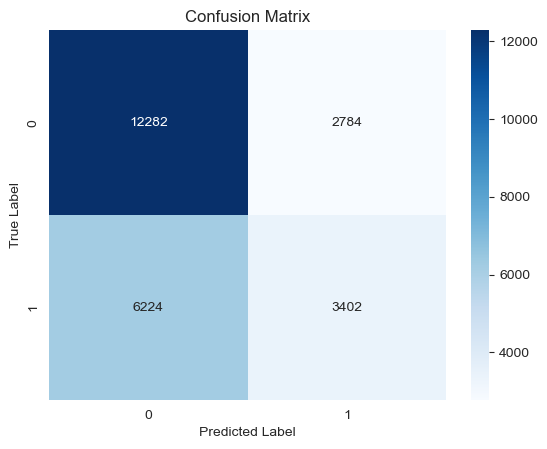

              precision    recall  f1-score   support

           0       0.66      0.82      0.73     15066
           1       0.55      0.35      0.43      9626

    accuracy                           0.64     24692
   macro avg       0.61      0.58      0.58     24692
weighted avg       0.62      0.64      0.61     24692



In [1677]:
y_pred = clf.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred))

In summary, we correctly predicted the class label for 12282 + 3402 = 15684 instances and made mistakes on 2784 + 6224 = 9008 instances.

AUC-ROC: 58.43


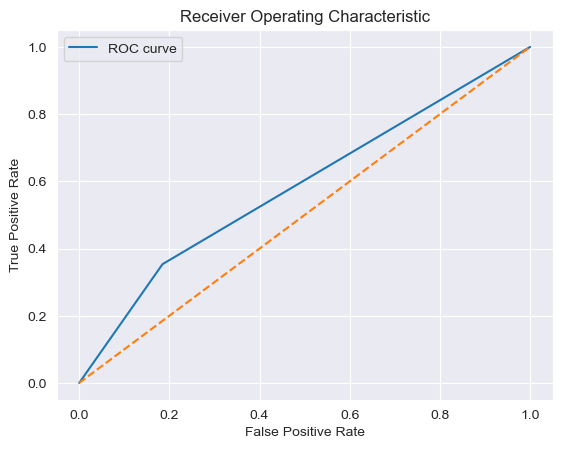

In [1650]:
# Computing ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)

# Plotting ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], linestyle='--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()

# Calculating and display AUC-ROC
roc_auc = auc(fpr, tpr)
print('AUC-ROC:',(round( roc_auc*100,2)))

 The AUC-ROC score is approximately 0.584. This indicates that our model has a modest ability to distinguish between the classes in your binary classification problem. In other words, given a random positive instance and a random negative instance, there's roughly a 58.4% chance that the model will rank the positive instance higher than the negative one.

In [ ]:
call(['python', '-m', 'nbconvert', 'Starbucks_Capstone_notebook.ipynb', '--to', 'html'])

# Conclusion:

1) In this project, I undertook an analysis of datasets provided by Starbucks with the aim of constructing a model capable of predicting whether a customer will complete an offer after viewing it.
2) Initially, I examined each dataset, visualizing the data to gain a comprehensive understanding.
3) This exploration involved dissecting various aspects of the datasets.
4) Subsequently, I transitioned to the Data-Preprocessing phase.  I created several latent features to enhance the model's performance. These features were derived from original existing columns, but with a simplified value range.
 5) I have created dummy variables for certain columns to avoid numerical bias when building a model.
6) This step proved to be the most demanding in terms of time and effort, given the complex nature of the data.
 7) It required me to employ my data wrangling, engineering, and preprocessing skills to derive the final clean versions of the three datasets.


# Further Improvements:
- As we can see, there is no significant change to the scores even after hyperparameter tuning both models; it is to be assumed that the dataset is imbalanced
- Techniques such as SMOTE or random under sampling can help to balance the classes.
- Techniques like bagging and boosting can help to improve the overall result by combining the predictions of multiple base estimators.
- We could also try deep learning models for better results
